In [1]:
import pickle
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

In [2]:
with open("./non_noise_fill/acc_mat_20.pkl", "rb") as reader:
    acc_mat = pickle.load(reader)
with open("./non_noise_fill/norm_mat_20.pkl", "rb") as reader:
    norm_mat = pickle.load(reader)

In [3]:
def plot_image(mat, file_name, title):
    if type(mat) == cp.ndarray:
        mat = mat.get()
    plt.matshow(mat)
    plt.xlabel('S_max')
    plt.ylabel('M')
    plt.title(title)
    plt.savefig(file_name)

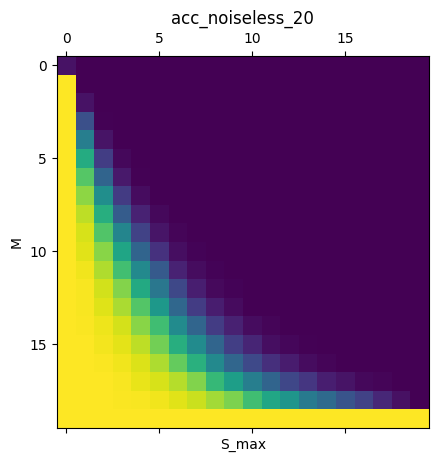

In [4]:
plot_image(acc_mat[1:,1:], "./images/acc_20_noiseless.png", "acc_noiseless_20")

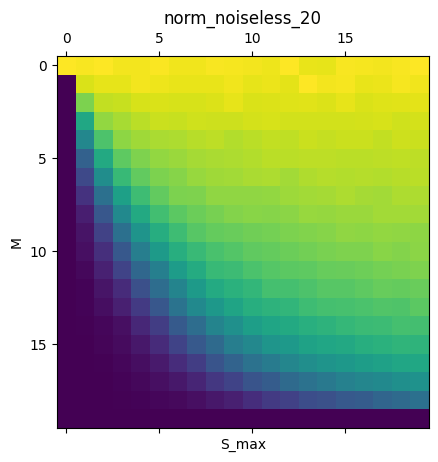

In [5]:
plot_image(norm_mat[1:,1:], "./images/norm_20_noiseless.png", "norm_noiseless_20")

In [45]:
with open("./non_noise/acc_mat_50.pkl", "rb") as reader:
    acc_mat_50 = pickle.load(reader)
with open("./non_noise/err_mat_50.pkl", "rb") as reader:
    norm_mat_50 = pickle.load(reader)

In [33]:
def interplotation(mat, mode = 'NORM'):
    if type(mat) == cp.ndarray:
        mat = mat.get()
        
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if mat[i][j] == 0:
                for l in range(j - 1, -2, -1):
                    if l == -1 or mat[i][l] != 0:
                        break
                for r in range(j + 1, mat.shape[1] + 1):
                    if r == mat.shape[1] or mat[i][r] != 0:
                        break
                
                if mode == 'NORM' and r == mat.shape[1] and l != -1:
                    mat[i][j] = mat[i][l]
                    
                if l != -1 and r != mat.shape[1]:
                    mat[i][j] = (j - l) / (r - l) * (mat[i][r] - mat[i][l]) + mat[i][l]
        
    
    for j in range(mat.shape[1]):
        for i in range(mat.shape[0]):
            if mat[i][j] == 0:
                for l in range(i - 1, -2, -1):
                    if l == -1 or mat[l][j] != 0:
                        break
                for r in range(i + 1, mat.shape[0] + 1):
                    if r == mat.shape[0] or mat[r][j] != 0:
                        break
                    
                if l != -1 and r != mat.shape[1]:
                    mat[i][j] = (i - l) / (r - l) * (mat[r][j] - mat[l][j]) + mat[l][j]
    return mat

In [36]:
norm_mat_50 = interplotation(norm_mat_50)
acc_mat_50 = interplotation(acc_mat_50, 'ACC')

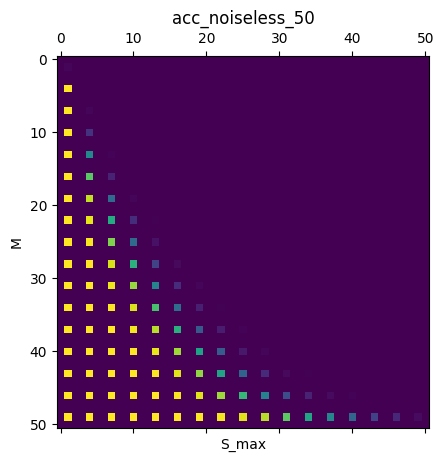

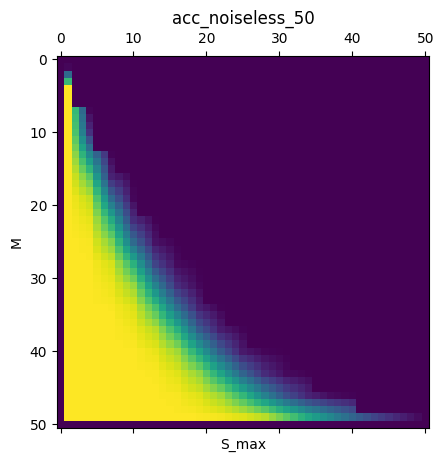

In [46]:
plot_image(acc_mat_50, "./images/acc_50_noiseless.png", "acc_noiseless_50")
plot_image(interplotation(acc_mat_50, "ACC"), "./images/acc_50_noiseless_interpolate.png", "acc_noiseless_50")

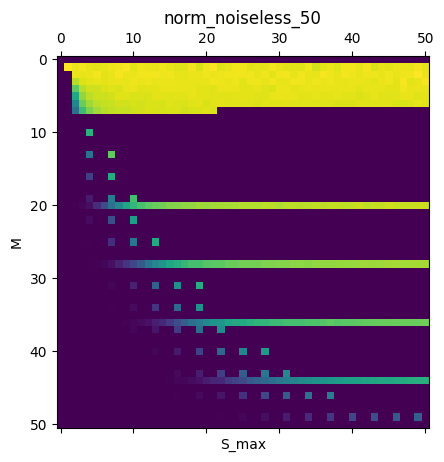

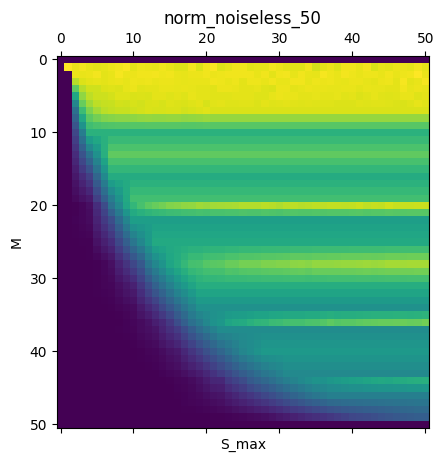

In [83]:
with open("./non_noise_fill/acc_mat_50.pkl", "rb") as reader:
    acc_mat_50 = pickle.load(reader)
with open("./non_noise_fill/norm_mat_50.pkl", "rb") as reader:
    norm_mat_50 = pickle.load(reader)

plot_image(norm_mat_50, "./images/norm_50_noiseless.png", "norm_noiseless_50")
plot_image(interplotation(norm_mat_50), "./images/norm_50_noiseless_interpolate.png", "norm_noiseless_50")

In [49]:
with open("./non_noise/acc_mat_100.pkl", "rb") as reader:
    acc_mat_100 = pickle.load(reader)
with open("./non_noise/err_mat_100.pkl", "rb") as reader:
    norm_mat_100 = pickle.load(reader)

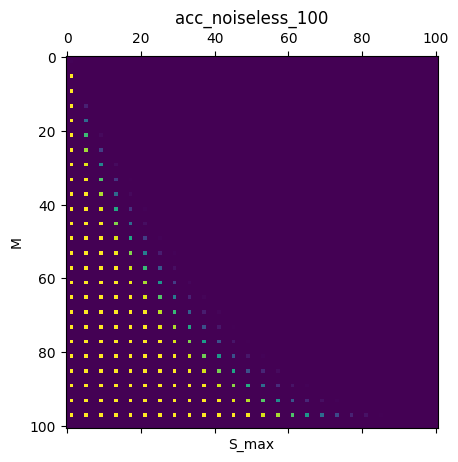

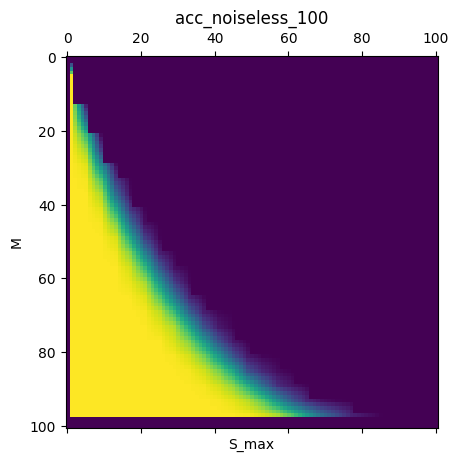

In [84]:
plot_image(acc_mat_100, "./images/acc_100_noiseless.png", "acc_noiseless_100")
plot_image(interplotation(acc_mat_100, "ACC"), "./images/acc_100_noiseless_interpolate.png", "acc_noiseless_100")

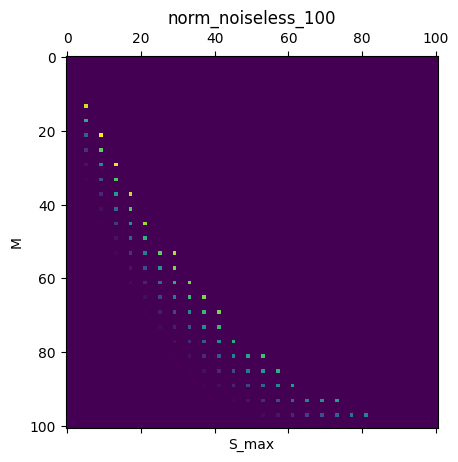

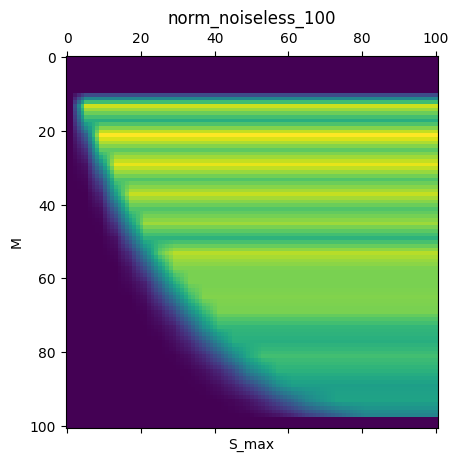

In [85]:
plot_image(norm_mat_100, "./images/norm_100_noiseless.png", "norm_noiseless_100")
plot_image(interplotation(norm_mat_100, "NORM"), "./images/norm_100_noiseless_interpolate.png", "norm_noiseless_100")

In [56]:
with open("noisy_with_s/acc_mat_noisy_s_20_001.pkl", "rb") as reader:
    acc_mat_s_20_001 = pickle.load(reader)
with open("./noisy_with_s/norm_mat_noisy_s_20_001.pkl", "rb") as reader:
    norm_mat_s_20_001 = pickle.load(reader)

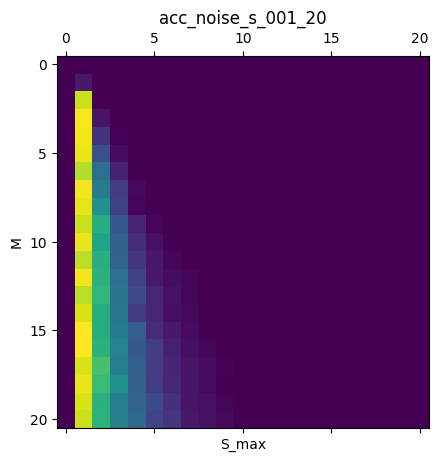

In [57]:
plot_image(acc_mat_s_20_001, "./images/acc_noise_s_001_20.png", "acc_noise_s_001_20")

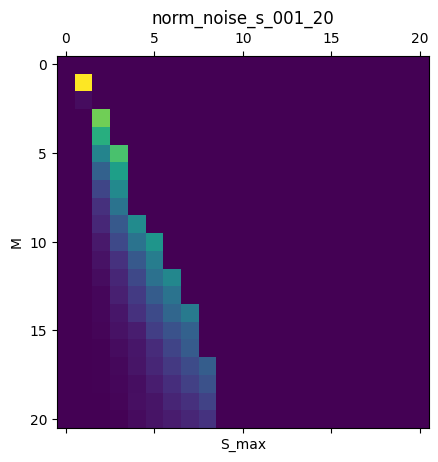

In [62]:
plot_image(norm_mat_s_20_001, "./images/norm_noise_s_001_20.png", "norm_noise_s_001_20")

In [59]:
with open("noisy_with_s/acc_mat_noisy_s_50_001.pkl", "rb") as reader:
    acc_mat_s_50_001 = pickle.load(reader)
with open("./noisy_with_s/norm_mat_noisy_s_50_001.pkl", "rb") as reader:
    norm_mat_s_50_001 = pickle.load(reader)

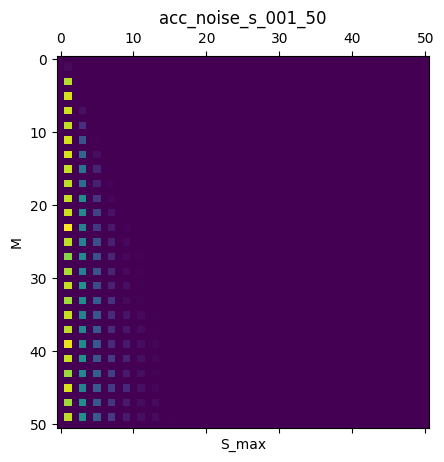

In [60]:
plot_image(acc_mat_s_50_001, "./images/acc_noise_s_001_50.png", "acc_noise_s_001_50")

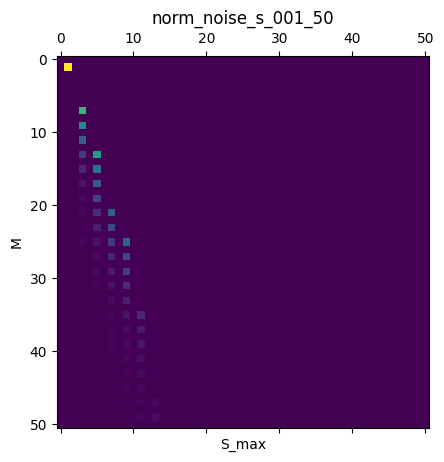

In [61]:
plot_image(norm_mat_s_50_001, "./images/norm_noise_s_001_50.png", "norm_noise_s_001_50")

In [69]:
with open("noisy_with_s/acc_mat_noisy_s_100_001.pkl", "rb") as reader:
    acc_mat_s_100_001 = pickle.load(reader)

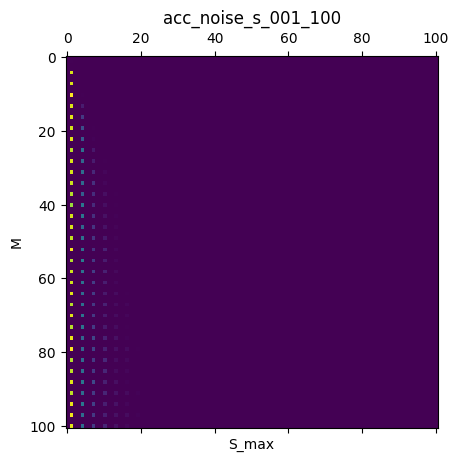

In [70]:
plot_image(acc_mat_s_100_001, "./images/acc_noise_s_001_100.png", "acc_noise_s_001_100")

In [64]:
with open("noisy_with_n/acc_mat_noisy_s_20_001.pkl", "rb") as reader:
    acc_mat_n_20_001 = pickle.load(reader)
with open("./noisy_with_n/norm_mat_noisy_s_20_001.pkl", "rb") as reader:
    norm_mat_n_20_001 = pickle.load(reader)

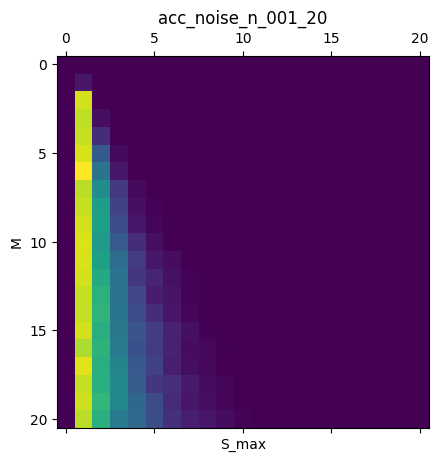

In [65]:
plot_image(acc_mat_n_20_001, "./images/acc_noise_n_001_20.png", "acc_noise_n_001_20")

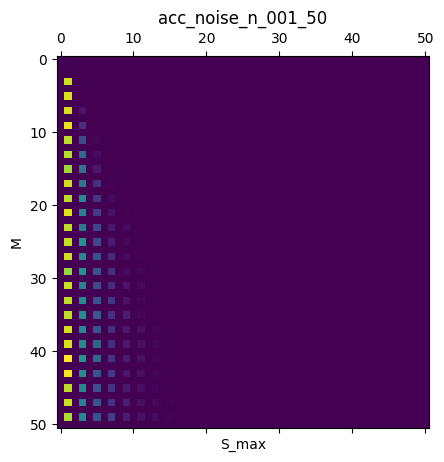

In [67]:
with open("noisy_with_n/acc_mat_noisy_s_50_001.pkl", "rb") as reader:
    acc_mat_n_50_001 = pickle.load(reader)
plot_image(acc_mat_n_50_001, "./images/acc_noise_n_001_50.png", "acc_noise_n_001_50")

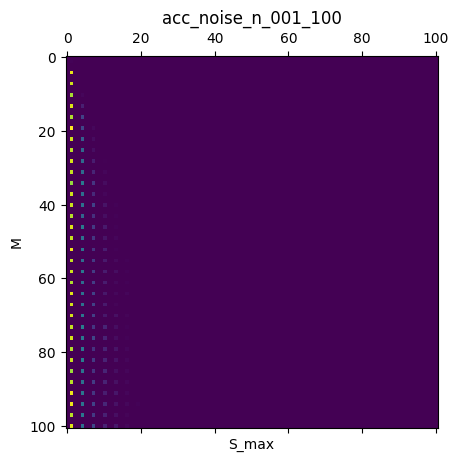

In [68]:
with open("noisy_with_n/acc_mat_noisy_s_100_001.pkl", "rb") as reader:
    acc_mat_n_100_001 = pickle.load(reader)
plot_image(acc_mat_n_100_001, "./images/acc_noise_n_001_100.png", "acc_noise_n_001_100")

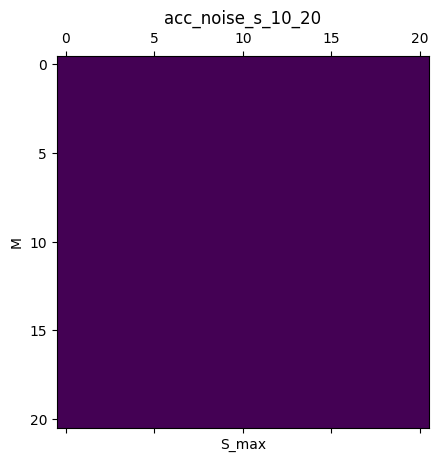

In [76]:
with open("noisy_with_s/acc_mat_noisy_s_20_10.pkl", "rb") as reader:
    acc_mat_s_10_20 = pickle.load(reader)
plot_image(acc_mat_s_10_20, "./images/acc_noise_s_10_20.png", "acc_noise_s_10_20")

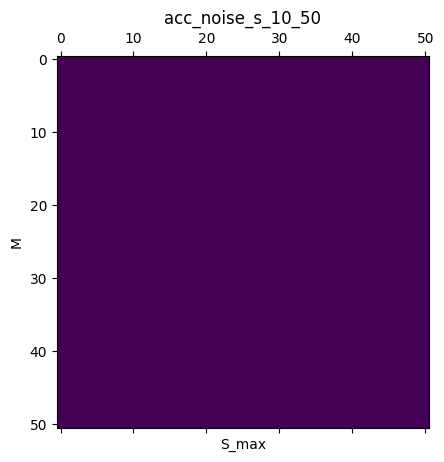

In [77]:
with open("noisy_with_s/acc_mat_noisy_s_50_10.pkl", "rb") as reader:
    acc_mat_s_10_50 = pickle.load(reader)
plot_image(acc_mat_s_10_50, "./images/acc_noise_s_10_50.png", "acc_noise_s_10_50")

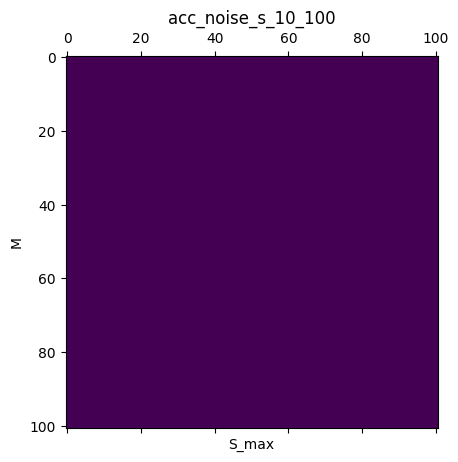

In [78]:
with open("noisy_with_s/acc_mat_noisy_s_100_10.pkl", "rb") as reader:
    acc_mat_s_10_100 = pickle.load(reader)
plot_image(acc_mat_s_10_100, "./images/acc_noise_s_10_100.png", "acc_noise_s_10_100")

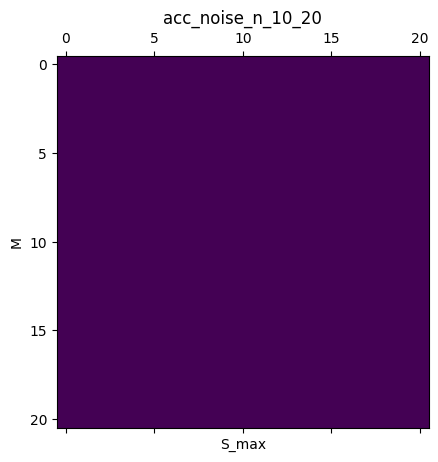

In [79]:
with open("noisy_with_n/acc_mat_noisy_s_20_10.pkl", "rb") as reader:
    acc_mat_n_10_20 = pickle.load(reader)
plot_image(acc_mat_n_10_20, "./images/acc_noise_n_10_20.png", "acc_noise_n_10_20")

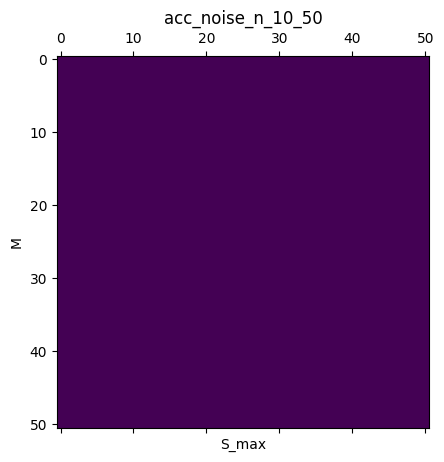

In [80]:
with open("noisy_with_n/acc_mat_noisy_s_50_10.pkl", "rb") as reader:
    acc_mat_n_10_50 = pickle.load(reader)
plot_image(acc_mat_n_10_50, "./images/acc_noise_n_10_50.png", "acc_noise_n_10_50")

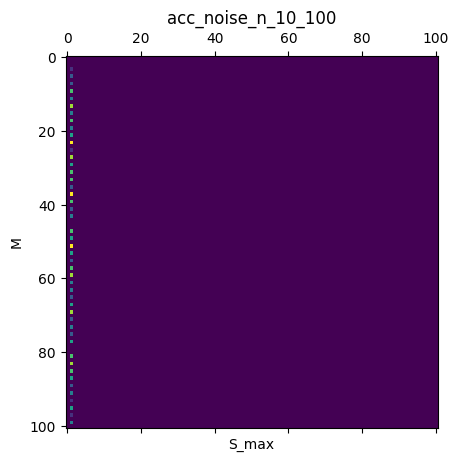

In [81]:
with open("noisy_with_n/acc_mat_noisy_s_100_10.pkl", "rb") as reader:
    acc_mat_n_10_100 = pickle.load(reader)
plot_image(acc_mat_n_10_100, "./images/acc_noise_n_10_100.png", "acc_noise_n_10_100")